In [1]:
%run './data_processing.ipynb'

Remaining rows:  6848


In [61]:
% config InlineBackend.figure_format = 'retina'
% matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8

In [19]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [3]:
CONTINUOUS_FEATURES = ['HH_SIZE', 'HH_CHILD',
                        'AGE',
                      'PED', 'SED_EAT', 'EXFREQ', 'FASTFDFREQ']
# cannot include weight and height because these are directly associated with
# BMI
EXCLUDED_CONTINUOUS_FEATURES = ['HEIGHT', 'WEIGHT']
CATEGORICAL_FEATURES = ['FAMINCOME', 'POVERTY130', 'POVERTY185',
                       'POVERTYLEVEL', 'FOODSTAMP', 'WIC',
                       'HHTENURE', 'HOUSETYPE', 'QFAMINCOME',
                       'GENHEALTH', 'SEX', 'RACE', 'MARST',
                       'EH_RESP', 'FOODSHOP', 'MEALPREP',
                       'SODA', 'DIETSODA', 'MILK', 'MEAT', 'STORE', 'STREASON', 'EXERCISE',
                       'FASTFD', 'FDTHERM', 'ENOUGHFD', 'ANYSECDRK',
                       'ANYSECEAT']

In [40]:
# Generate feature matrix and label array
X = df_atus[CATEGORICAL_FEATURES + CONTINUOUS_FEATURES].as_matrix()
y = df_atus['BMI'].as_matrix()

In [41]:
assert len(y) == len(X)

In [42]:
# Split data into training, validation, and test set

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.4)
X_validation, X_test, y_validation, y_test = train_test_split(X_validation, y_validation, test_size=0.3)

## Fit Random Forest decision-tree model on the data using mean squared error as criterion

In [43]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

### Evaluate model fit on validation set

In [44]:
model.score(X_validation, y_validation)

0.034221654137033819

In [52]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = df_atus[CATEGORICAL_FEATURES + CONTINUOUS_FEATURES].columns

# Print the feature ranking
print("Feature ranking (best to worst):")

for f in range(X.shape[1]):
    print("%d. feature %d (%s): %f" % (f + 1, indices[f], feature_names[f], importances[indices[f]]))

Feature ranking (best to worst):
1. feature 30 (FAMINCOME): 0.143378
2. feature 9 (POVERTY130): 0.107481
3. feature 31 (POVERTY185): 0.100166
4. feature 0 (POVERTYLEVEL): 0.079929
5. feature 32 (FOODSTAMP): 0.058822
6. feature 33 (WIC): 0.042563
7. feature 28 (HHTENURE): 0.039798
8. feature 34 (HOUSETYPE): 0.038412
9. feature 21 (QFAMINCOME): 0.033676
10. feature 11 (GENHEALTH): 0.032541
11. feature 3 (SEX): 0.027847
12. feature 12 (RACE): 0.026195
13. feature 10 (MARST): 0.022847
14. feature 1 (EH_RESP): 0.022223
15. feature 20 (FOODSHOP): 0.021551
16. feature 17 (MEALPREP): 0.017589
17. feature 5 (SODA): 0.015780
18. feature 8 (DIETSODA): 0.015340
19. feature 15 (MILK): 0.013345
20. feature 24 (MEAT): 0.012983
21. feature 2 (STORE): 0.012894
22. feature 6 (STREASON): 0.012573
23. feature 16 (EXERCISE): 0.012099
24. feature 14 (FASTFD): 0.010747
25. feature 25 (FDTHERM): 0.010346
26. feature 4 (ENOUGHFD): 0.009296
27. feature 18 (ANYSECDRK): 0.008827
28. feature 27 (ANYSECEAT): 0.0086

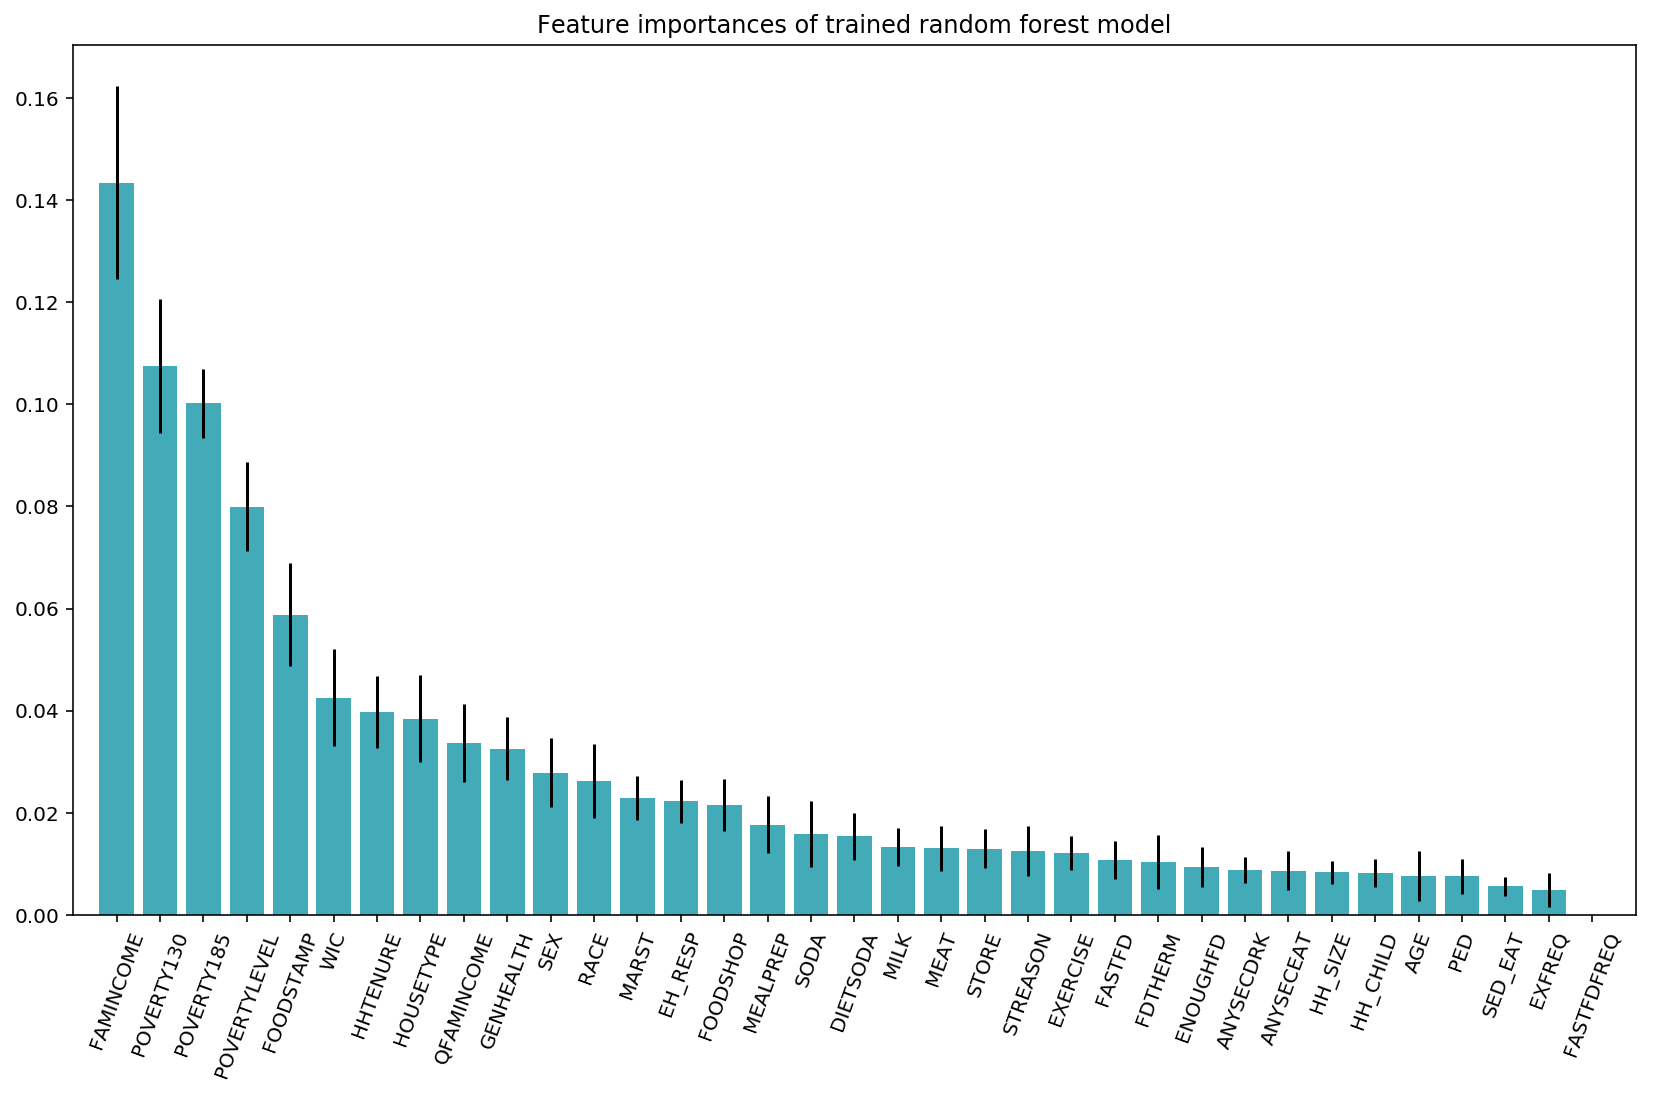

In [65]:
# Plot the feature importances of the forest
std = np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)

plt.figure()
plt.title("Feature importances of trained random forest model")
plt.bar(range(X.shape[1]), importances[indices],
       color='#43ABB7', yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names, rotation=70)
plt.xlim([-1, X.shape[1]])
plt.show()